In [1]:
import Bio as Bio
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo
import os
from Bio.Align.Applications import ClustalwCommandline

In [2]:
s1 = SeqIO.read("sequence1.fasta", "fasta")
s2 = SeqIO.read("sequence2.fasta", "fasta")
s3 = SeqIO.read("sequence3.fasta", "fasta")
s4 = SeqIO.read("sequence4.fasta", "fasta")
s5 = SeqIO.read("sequence5.fasta", "fasta")
s6 = SeqIO.read("sequence6.fasta", "fasta")

In [76]:
s1.id = 'Angel_Shark'
s2.id = 'Gray_Reef_Shark'
s3.id = 'Mako_Shark'
s4.id = 'Tiger_Shark'
s5.id = 'Great_White_Shark'
s6.id = 'Hammerhead_Shark'
print(s1.description)
print(s2.description)
print(s3.description)
print(s4.description)
print(s5.description)
print(s6.description)

NC_035057.1 Squatina squatina voucher OC-257 mitochondrion, complete genome
MT663280.1 Carcharhinus amblyrhynchos voucher OC-891 mitochondrion, complete genome
MF537044.1 Isurus oxyrinchus mitochondrion, complete genome
KX858829.1 Galeocerdo cuvier voucher eFish-1156 mitochondrion, complete genome
KX389266.1 Carcharodon carcharias isolate delaware_2007 mitochondrion, complete genome
NC_035491.1 Sphyrna mokarran voucher OC-226 mitochondrion, complete genome


In [56]:
sharks = SeqIO.write([s1,s2,s3,s4,s5,s6], "sharks.fasta", "fasta")

Here we execute ClustalW for multiple sequence alignment, if you are going to apply multiple sequence alignment elsewhere, place the .aln file in the working directory.

In [69]:
alignment_file_path = "sharks.aln"
if not os.path.isfile(alignment_file_path): # If the file exists, avoid executing clustalw
    clustalw_exe = "c:\\Program Files (x86)\\ClustalW2\\clustalw2.exe" # Path of the ClustalW program
    clustalw_cline = ClustalwCommandline(clustalw_exe, infile="sharks.fasta")
    assert os.path.isfile(clustalw_exe), "Clustal W executable missing" # Throw an error if executable does not exist
    stdout, stderr = clustalw_cline()

In [70]:
with open("sharks.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
print(type(alignment))

<class 'Bio.Align.MultipleSeqAlignment'>


In [71]:
from Bio.Phylo.TreeConstruction import DistanceCalculator 
# Distance matrix is calculated from identity by default, other options are blastn and trans
# dna_matrices= {'blastn': [[5], [-4, 5], [-4, -4, 5], [-4, -4, -4, 5]], 'trans': [[6], [-5, 6], [-5, -1, 6], [-1, -5, -5, 6]]}
calculator = DistanceCalculator('identity')
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)

Gray_Reef_Shark 0.000000
Tiger_Shark 0.114228    0.000000
Hammerhead_Shark    0.119210    0.135164    0.000000
Mako_Shark  0.198980    0.204258    0.207046    0.000000
Great_White_Shark   0.196489    0.201708    0.202716    0.125259    0.000000
Angel_Shark 0.207995    0.211968    0.216713    0.227389    0.223474    0.000000
    Gray_Reef_Shark Tiger_Shark Hammerhead_Shark    Mako_Shark  Great_White_Shark   Angel_Shark


In [72]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor()

In [73]:
# Construct a tree according to neighbor-joining algorithm
shark_tree_nj= constructor.nj(distance_matrix=distance_matrix)
shark_tree_nj.rooted = True
print(shark_tree_nj)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner4')
        Clade(branch_length=0.05197274776110551, name='Gray_Reef_Shark')
        Clade(branch_length=0.062255352588814414, name='Tiger_Shark')
        Clade(branch_length=0.0036660043888263397, name='Inner3')
            Clade(branch_length=0.031674426190617375, name='Inner2')
                Clade(branch_length=0.117895340331732, name='Angel_Shark')
                Clade(branch_length=0.044906391475396865, name='Inner1')
                    Clade(branch_length=0.06096910029061149, name='Great_White_Shark')
                    Clade(branch_length=0.06429037423640353, name='Mako_Shark')
            Clade(branch_length=0.0664069450210545, name='Hammerhead_Shark')


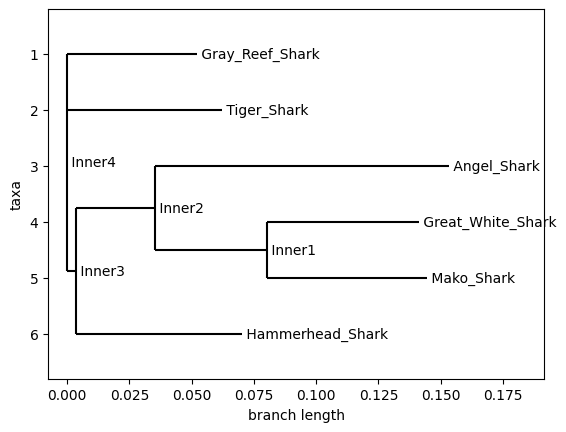

In [74]:
Phylo.draw(shark_tree_nj)

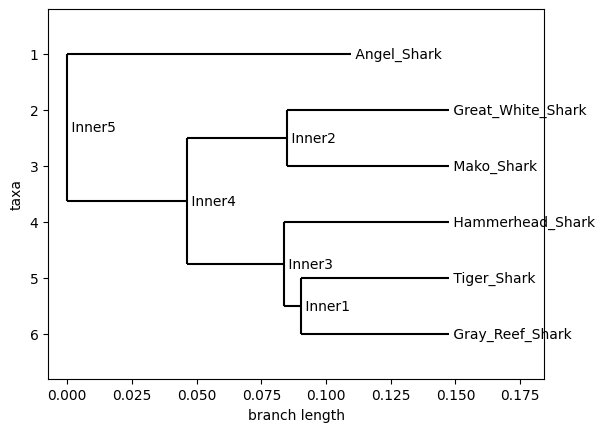

In [75]:
# Construct a tree according to neighbor-joining algorithm
shark_tree_upgma = constructor.upgma(distance_matrix)
Phylo.draw(shark_tree_upgma)

### Using Tree and Clade Objects

In [64]:
# Get the non-leaf nodes as clade objects,
nonterminals = shark_tree_upgma.get_nonterminals()
nonterminals

[Clade(branch_length=0, name='Inner5'),
 Clade(branch_length=0.04610120989265165, name='Inner4'),
 Clade(branch_length=0.03868023842002252, name='Inner2'),
 Clade(branch_length=0.03771647589110963, name='Inner3'),
 Clade(branch_length=0.006479449617460442, name='Inner1')]

In [65]:
# Get the leaf nodes as clade objects, branch length is the distance to the root
terminals = shark_tree_upgma.get_terminals()
terminals

[Clade(branch_length=0.10969470968507206, name='Angel_Shark'),
 Clade(branch_length=0.06262973726350751, name='Great_White_Shark'),
 Clade(branch_length=0.06262973726350751, name='Mako_Shark'),
 Clade(branch_length=0.0635934997924204, name='Hammerhead_Shark'),
 Clade(branch_length=0.05711405017495996, name='Tiger_Shark'),
 Clade(branch_length=0.05711405017495996, name='Gray_Reef_Shark')]

In [66]:
# Find the most recent 
mrca_grwhite_mako = shark_tree_upgma.common_ancestor(targets=["Great_White_Shark","Mako_Shark"])
mrca_grwhite_mako

Clade(branch_length=0.03868023842002252, name='Inner2')

In [67]:
shark_tree_upgma.distance(target1=mrca_grwhite_mako,target2="Angel_Shark")

0.19447615799774623